# Using CNN to classifiy malicious PE files into malware family

Please take a careful look at the following tutorial.

https://www.tensorflow.org/tutorials/keras/classification

It is an example of using tensorflow/keras to build a simple neural network to classify images of clothing. The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.

Please write your homework by modifying this tutorial. We will provide you the first 748 bytes of several PE files and their corresponding class labels (just like the example in the tutorial). Please desgin a more complicated neural network (e.g., using convolution, pooling, dense, dropout, dense, softmax, ...) to increase the classification accuracy.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


### Get pefiles



In [ ]:
# get data from github

import requests

def download_request(url, out_name):
    response = requests.get(url)
    if response.status_code == 200:
        with open(out_name, 'wb') as f:
            f.write(response.content)
    else:
        print('Error: Failed to download the file')

#
url = 'https://github.com/hsiaom26/DS4CS-24/raw/main/data/pefiles.pickle'
out_name = 'pefiles.pickle'
download_request(url, out_name)

In [ ]:
!ls -al

total 288
drwxr-xr-x 1 root root   4096 Apr 26 12:42 .
drwxr-xr-x 1 root root   4096 Apr 26 12:22 ..
drwxr-xr-x 4 root root   4096 Apr 24 13:20 .config
-rw-r--r-- 1 root root 275871 Apr 26 12:42 pefiles.pickle
drwxr-xr-x 1 root root   4096 Apr 24 13:21 sample_data


### load training data

In [ ]:
import pickle

def my_load_data(p):
  with open(p, 'rb') as fd:
    tu = pickle.load(fd)
  return (tu[0], tu[1])

In [63]:
(train_images, train_labels) = my_load_data("/content/pefiles.pickle")

In [ ]:
# now go https://www.tensorflow.org/tutorials/keras/classification
# and try to understand the tutorial
# and write your code below.
# My codes is very similar to the tutorial.

In [64]:
# our data includes 11 different malware families
class_names = ['Urausy.C', 'Elkern.B', 'Fareit', 'Hotbar', 'Gepys.A', 'Bulta!rfn', 'Zbot',
               'GameVance', 'Zegost.B', 'Bifrose.AE', 'Zbot!GO']
len_classes = len(class_names)

print(len_classes)

11


### Explore the data

In [65]:
# We have 3xx malware pefiles, and each of them is represented as a 28x28 byte array.
train_images.shape

(348, 28, 28)

In [66]:
# The lenght of the label is 356 as well.
len(train_labels)

348

In [67]:
# Each label is an integer (ranging from 0 to 10).
# The 1st malware's label is 4.
# See class_names. Its index starts from 0.
train_labels

array([4, 3, 4, 3, 1, 8, 8, 1, 3, 5, 1, 4, 8, 0, 3, 3, 8, 5, 4, 8, 1, 6,
       4, 8, 4, 1, 2, 0, 8, 3, 1, 1, 2, 4, 1, 4, 4, 1, 8, 5, 6, 1, 4, 3,
       3, 4, 3, 5, 3, 3, 3, 5, 5, 4, 4, 3, 5, 4, 4, 0, 8, 3, 3, 4, 2, 4,
       3, 6, 3, 5, 8, 1, 5, 8, 3, 3, 1, 5, 2, 4, 6, 0, 8, 5, 3, 3, 3, 2,
       5, 3, 4, 6, 6, 1, 5, 8, 3, 4, 4, 3, 3, 8, 1, 3, 3, 3, 3, 5, 4, 2,
       6, 3, 4, 3, 4, 8, 1, 3, 1, 1, 0, 0, 4, 4, 5, 5, 8, 3, 2, 3, 3, 3,
       4, 0, 5, 0, 1, 8, 4, 2, 1, 3, 5, 1, 1, 4, 2, 8, 4, 4, 3, 1, 4, 8,
       4, 4, 3, 4, 0, 5, 4, 3, 3, 8, 6, 4, 4, 0, 8, 3, 4, 5, 3, 4, 5, 1,
       2, 3, 1, 3, 3, 3, 4, 5, 3, 8, 5, 3, 6, 4, 4, 3, 4, 2, 4, 3, 8, 1,
       4, 5, 4, 3, 6, 1, 3, 3, 4, 8, 4, 8, 5, 5, 6, 0, 4, 3, 4, 5, 4, 3,
       3, 3, 4, 3, 4, 5, 3, 4, 8, 3, 5, 1, 5, 1, 3, 1, 2, 4, 0, 3, 1, 1,
       0, 3, 8, 3, 3, 5, 5, 0, 5, 4, 3, 8, 4, 6, 3, 0, 5, 5, 1, 6, 1, 3,
       5, 6, 8, 1, 1, 5, 4, 6, 4, 5, 5, 3, 1, 1, 4, 6, 5, 4, 4, 4, 1, 3,
       6, 4, 8, 8, 4, 8, 3, 1, 1, 2, 1, 6, 3, 4, 3,

In [68]:
# An example of first (indexed by 0) PE files.
# It is a 28x28 integer matrix.
train_images[0]

array([[ 77,  90, 144,   0,   3,   0,   0,   0,   4,   0,   0,   0, 255,
        255,   0,   0, 184,   0,   0,   0,   0,   0,   0,   0,  64,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 248,   0,   0,   0,  14,  31, 186,  14,   0,
        180,   9, 205,  33, 184,   1,  76, 205,  33,  84, 104, 105, 115,
         32, 112],
       [114, 111, 103, 114,  97, 109,  32,  99,  97, 110, 110, 111, 116,
         32,  98, 101,  32, 114, 117, 110,  32, 105, 110,  32,  68,  79,
         83,  32],
       [109, 111, 100, 101,  46,  13,  13,  10,  36,   0,   0,   0,   0,
          0,   0,   0, 165,  63,  53,  94, 225,  94,  91,  13, 225,  94,
         91,  13],
       [225,  94,  91,  13, 142,  40, 240,  13, 228,  94,  91,  13, 250,
        195, 197,  13, 251,  94,  91,  13, 250, 195, 241,  13,  68,  94,
         91,  13],
       [250, 195, 240,  13, 171,  94,  91,  13, 232,  38, 216,  13, 235,
         94,  91,  13, 232,  38, 200,  13, 242,  94,  91,  13, 225,  94,
         90,  13],
       [141,  95,  91,  13, 250, 195, 244,  13, 200,  94,  91,  13, 250,
        195, 193,  13, 224,  94,  91,  13, 250, 195, 198,  13, 224,  94,
         91,  13],
       [ 82, 105,  99, 104, 225,  94,  91,  13,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  80,  69,
          0,   0],
       [ 76,   1,   3,   0,  12, 169,  39,  81,   0,   0,   0,   0,   0,
          0,   0,   0, 224,   0,   3,   1,  11,   1,  10,   0,   0,  48,
          5,   0],
       [  0,  32,   0,   0,   0, 144,   6,   0, 176, 195,  11,   0,   0,
        160,   6,   0,   0, 208,  11,   0,   0,   0,  64,   0,   0,  16,
          0,   0],
       [  0,   2,   0,   0,   5,   0,   1,   0,   0,   0,   0,   0,   5,
          0,   1,   0,   0,   0,   0,   0,   0, 240,  11,   0,   0,  16,
          0,   0],
       [ 47,  83,   6,   0,   2,   0,  64, 129,   0,   0,  16,   0,   0,
         16,   0,   0,   0,   0,  16,   0,   0,  16,   0,   0,   0,   0,
          0,   0],
       [ 16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  92,
        235,  11,   0,  48,   2,   0,   0,   0, 208,  11,   0,  92,  27,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  72,   5,   0, 176,
         14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [100, 197,  11,   0,  72,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  85,  80,  88,  48,   0,   0,
          0,   0],
       [  0, 144,   6,   0,   0,  16,   0,   0,   0,   0,   0,   0,   0,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [128,   0,   0, 224,  85,  80,  88,  49,   0,   0,   0,   0,   0,
         48,   5,   0,   0, 160,   6,   0,   0,  38,   5,   0,   0,   4,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,
          0,   0, 224,  46, 114, 115, 114,  99,   0,   0,   0,   0,  32,
          0,   0],
       [  0, 208,  11,   0,   0,  30,   0,   0,   0,  42,   5,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64,   0,
          0, 192],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

### Preprocess the data

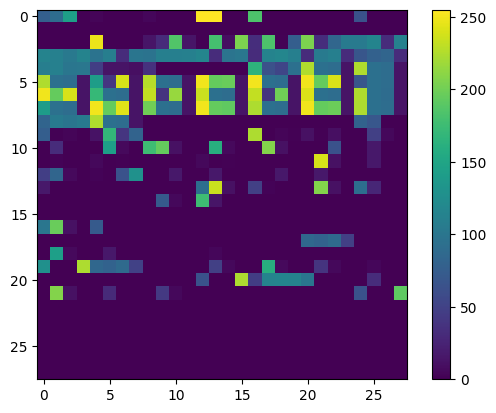

In [69]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


# Note that we can view the first 28x28 bytes of a PE file as an image.
# A byte with value 0 (or '0x00') has darkest color,
# while a byte with value 255 (or '0xFF') has brightest color.
# Below is the visualization of the first PE file.

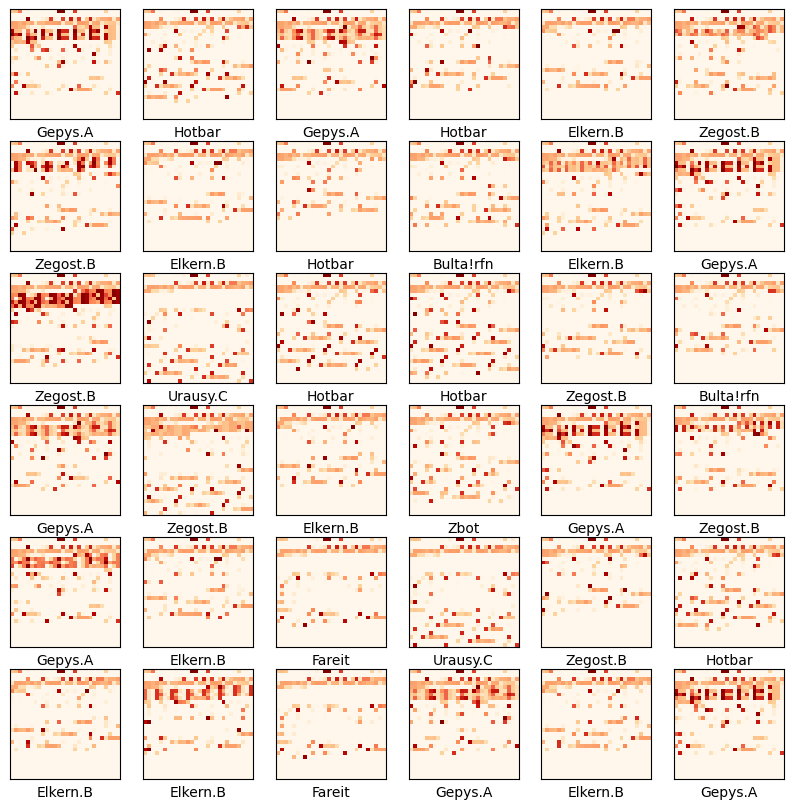

In [70]:
# Here are the examples of 36 PE files,
# presented as 28x28 images.
# However, I use 'plt.cm.binary' to show only grey-scale color.
# You may try the following page to change to other colors.
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.OrRd)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The above images are samples of different PE files. Could you visually distinguish them? Their labels are shown under each of the image.

Q1: Before building the model, if there is anything you can do to the data, do it right here.


In [ ]:
# Any preprocessing?

In [71]:
# Normalize pixel values to be between 0 and 1 (N02_Convolution.ipynb)
train_images = train_images / 255.0

### Build the model

In [72]:
# This is the model from tensorflow's example.
# Please try to modify it.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len_classes)
])

In [73]:
# This is the training sonfig from tensorflow's example.
# Please try to modify it.

model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Q2: Why the example use 'SparseCategoricalCrossentropy' and what is 'from_logits'? Is "SGD" good enough? (what if not?)

A2:

1.使用SparseCategoricalCrossentropy作為損失函數，其輸入標籤的索引為一個整數。

2.from_logits如果最後一層不是'softmax'或'sigmoid'，那麼輸出值不會被轉移到[0.0, 1.0]。在上述code中，最後一層稱為“logits”，因此必須將CNN的損失函數中的 from_logits 設為 True。

3.SGD相對於其他方法，像是Adam、RMSprop等具有較少的參數。且其調整參數過程更加簡單，特別是對於小型資料集或較簡單的模型。

In [74]:
# A2: Use SGD
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 5

history = model.fit(
    x = train_images,
    y = train_labels,
#    batch_size = 32, # If unspecified, batch_size will default to 32.
    epochs = epochs, # default 1, an epoch is an iteration over the entire data
    validation_split = 0.1,
    # validation_data = (x_val, y_val), # if you have another validation dataset
    )

Epoch 1/5
10/10 [==============================] - 0s 21ms/step - loss: 2.3418 - accuracy: 0.1949 - val_loss: 2.2723 - val_accuracy: 0.3143
Epoch 2/5
10/10 [==============================] - 0s 6ms/step - loss: 2.1536 - accuracy: 0.3706 - val_loss: 2.1467 - val_accuracy: 0.3143
Epoch 3/5
10/10 [==============================] - 0s 6ms/step - loss: 2.0049 - accuracy: 0.4377 - val_loss: 2.0511 - val_accuracy: 0.3143
Epoch 4/5
10/10 [==============================] - 0s 6ms/step - loss: 1.8861 - accuracy: 0.4409 - val_loss: 1.9720 - val_accuracy: 0.3143
Epoch 5/5
10/10 [==============================] - 0s 6ms/step - loss: 1.7849 - accuracy: 0.4409 - val_loss: 1.9033 - val_accuracy: 0.3143


In [48]:
# A2: Use adam
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs = 5

history = model.fit(
    x = train_images,
    y = train_labels,
#    batch_size = 32, # If unspecified, batch_size will default to 32.
    epochs = epochs, # default 1, an epoch is an iteration over the entire data
    validation_split = 0.1,
    # validation_data = (x_val, y_val), # if you have another validation dataset
    )

Epoch 1/5
10/10 [==============================] - 1s 21ms/step - loss: 1.9324 - accuracy: 0.2524 - val_loss: 2.1095 - val_accuracy: 0.1429
Epoch 2/5
10/10 [==============================] - 0s 7ms/step - loss: 1.9288 - accuracy: 0.2524 - val_loss: 2.1150 - val_accuracy: 0.1429
Epoch 3/5
10/10 [==============================] - 0s 6ms/step - loss: 1.9259 - accuracy: 0.2524 - val_loss: 2.1168 - val_accuracy: 0.1429
Epoch 4/5
10/10 [==============================] - 0s 6ms/step - loss: 1.9246 - accuracy: 0.2524 - val_loss: 2.1204 - val_accuracy: 0.1429
Epoch 5/5
10/10 [==============================] - 0s 6ms/step - loss: 1.9233 - accuracy: 0.2524 - val_loss: 2.1210 - val_accuracy: 0.1429


### Train the model

In [75]:
# This is the fitting function from tensorflow's example.
# Please try to modify it.

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
11/11 [==============================] - 0s 2ms/step - loss: 1.7145 - accuracy: 0.4282
Epoch 2/5
11/11 [==============================] - 0s 2ms/step - loss: 1.6364 - accuracy: 0.4282
Epoch 3/5
11/11 [==============================] - 0s 2ms/step - loss: 1.5679 - accuracy: 0.4253
Epoch 4/5
11/11 [==============================] - 0s 2ms/step - loss: 1.5062 - accuracy: 0.4282
Epoch 5/5
11/11 [==============================] - 0s 2ms/step - loss: 1.4503 - accuracy: 0.4368


Q3: What is 'epochs'? How does it affect the result?

A3:epochs是訓練神經網路時的一個重要參數，它指的是將整個訓練資料集通過神經網路訓練的次數。每個epoch都代表模型訓練整個資料集一次並進行參數更新。


Underfitting與Overfitting：如果epochs過少，模型可能無法從資料中學到足夠的模式，導致underfitting。相反，如果epochs過多，模型可能會過度擬合（overfitting），將訓練資料的噪聲視為模式，從而導致在測試資料上的性能下降。

In [76]:
#A3 change epochs
#add epochs number

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
11/11 [==============================] - 0s 2ms/step - loss: 1.3985 - accuracy: 0.4425
Epoch 2/10
11/11 [==============================] - 0s 2ms/step - loss: 1.3517 - accuracy: 0.4828
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 1.3079 - accuracy: 0.5316
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 1.2669 - accuracy: 0.5517
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 1.2287 - accuracy: 0.5546
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 1.1926 - accuracy: 0.5489
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 1.1592 - accuracy: 0.5690
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 1.1274 - accuracy: 0.5747
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 1.0972 - accuracy: 0.6063
Epoch 10/10
11/11 [==============================] - 0s 2ms/step - loss: 1.0702 - accuracy: 0.6494


Q4: What is 'split_validation' in model.fit()? Check it out in tensorflow's web page. Use it in your code.

A4:
validation_split=0.2將訓練數據集劃分為訓練集和驗證集，其中80%的資料用於訓練，20%的資料用於驗證。這樣訓練過程中就會同時監控訓練損失和驗證損失，以及訓練準確率和驗證準確率，有助於評估模型的性能並調整模型的參數。

In [77]:
# A4 Use split_validation
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
9/9 [==============================] - 0s 12ms/step - loss: 1.0283 - accuracy: 0.6978 - val_loss: 1.1056 - val_accuracy: 0.6857
Epoch 2/10
9/9 [==============================] - 0s 7ms/step - loss: 1.0079 - accuracy: 0.7158 - val_loss: 1.0954 - val_accuracy: 0.6857
Epoch 3/10
9/9 [==============================] - 0s 6ms/step - loss: 0.9867 - accuracy: 0.7266 - val_loss: 1.0813 - val_accuracy: 0.7143
Epoch 4/10
9/9 [==============================] - 0s 7ms/step - loss: 0.9687 - accuracy: 0.7446 - val_loss: 1.0684 - val_accuracy: 0.7143
Epoch 5/10
9/9 [==============================] - 0s 7ms/step - loss: 0.9496 - accuracy: 0.7446 - val_loss: 1.0513 - val_accuracy: 0.7286
Epoch 6/10
9/9 [==============================] - 0s 7ms/step - loss: 0.9317 - accuracy: 0.7590 - val_loss: 1.0368 - val_accuracy: 0.7286
Epoch 7/10
9/9 [==============================] - 0s 7ms/step - loss: 0.9153 - accuracy: 0.7590 - val_loss: 1.0220 - val_accuracy: 0.7286
Epoch 8/10
9/9 [=================

Q5: Could you exaplin the output of model.fit()? And what is your accuracy?

A5:

這個model.fit()的輸出顯示了模型在訓練過程中的性能指標，包括損失（loss）和準確率（accuracy）。每個epoch都顯示了訓練集和驗證集的損失和準確率。

例如，在第一個epoch中，訓練集的損失為1.0283，準確率為0.6978，而驗證集的損失為 1.1056，準確率為0.6857。依此類推，隨著epoch的增加，訓練集和驗證集的損失逐漸降低，而準確率則逐步提高。

總的來說，這些輸出用於監控模型在訓練過程中的表現，並且可以幫助我們評估模型的訓練狀況以及是否存在overfitting 或underfitting的問題。

至於模型的準確率，它會在最後一個epoch的結果中給出，即在訓練完成後顯示的資料中找到最後一個epoch的訓練集和驗證集的準確率。在這個例子中，模型的最終訓練準確率為0.8058，驗證準確率為0.7286。

Q6: How do you know your model is not overfitted?

A6:

可以通過觀察訓練過程中的訓練集和驗證集的損失和準確率來判斷模型是否過度擬合。

訓練集和驗證集的損失趨勢：如果模型過度擬合，訓練集的損失通常會持續下降，但驗證集的損失會在一定點後開始上升。

可以觀察訓練過程中訓練集和驗證集的損失曲線，如果它們在整個訓練過程中都保持下降或趨於穩定，則可能表示模型沒有過度擬合。
訓練集和驗證集的準確率： 同樣地，如果模型過度擬合，訓練集的準確率通常會持續提高，但驗證集的準確率會在一定點後開始下降。


因此可以觀察訓練過程中訓練集和驗證集的準確率曲線，如果它們之間的差距不大且都在增加，則可能表示模型沒有過度擬合。

early stop mechanism： 另一種常用的方法是使用Early Stopping，即在驗證集的性能停止提升時提前停止訓練。這可以通過觀察驗證集的損失或準確率，在其達到最佳值後不再改善時停止訓練，從而避免過度擬合。

Q7: Could you introduce 'early stop mechanism' in your code? Then, train the model again. "Early stop" means you can stop the epoch (without finishing all of them). You can prepare a validation data set and calculate your val_loss and val_accuracy at the end of each epoch. If you believe the val_loss will not improve for the next epoch, then you can stop the traning, to save time and to prevent overfitting. Does it works?

A7:


根據這個訓練結果，模型在訓練到第4個 epoch 時停止了。這意味著在這個情況下，early stop mechanism被觸發了，模型停止了訓練。從驗證集的損失（val_loss）和準確率（val_accuracy）來看，它們在這 4 個 epoch 內並沒有顯著改善的跡象，這可能是導致early stop mechanism觸發的原因之一。因此，根據這個結果，early stop mechanism在這個情況下是有效的，它幫助防止了模型的過度擬合，同時也節省了訓練時間。

In [82]:
# A7 Introduce early stop mechanism

epochs2 = 20
callback = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy', # default 'loss', you may try 'acc', 'val_acc', ...
    min_delta = 0.0005, # minimum change of 'monitor' to qualify as an improvementess.
    patience = 3, # epochs with no improvement after which training will be stopped.
    )

history3 = model.fit(train_images, train_labels,
                      epochs = epochs2,
                      callbacks=[callback],
                      validation_split = 0.1,
                      )
print("Stop at epoch", len(history3.history['loss']))
print("Epoch is set to", epochs2)


Epoch 1/20
10/10 [==============================] - 0s 10ms/step - loss: 0.4786 - accuracy: 0.8978 - val_loss: 0.6850 - val_accuracy: 0.8000
Epoch 2/20
10/10 [==============================] - 0s 6ms/step - loss: 0.4749 - accuracy: 0.8978 - val_loss: 0.6830 - val_accuracy: 0.8000
Epoch 3/20
10/10 [==============================] - 0s 6ms/step - loss: 0.4709 - accuracy: 0.8946 - val_loss: 0.6822 - val_accuracy: 0.8000
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 0.4671 - accuracy: 0.8978 - val_loss: 0.6802 - val_accuracy: 0.8000
Stop at epoch 4
Epoch is set to 20


Q8: Any idea of improving the classification accuracy?

A8:

調整模型架構： 試著調整模型的層數、神經元數量、激活函數等參數，可能有助於提高準確率。可以嘗試添加更多的層或者使用更複雜的模型來捕捉更多的特徵。

優化器和學習率： 嘗試不同的優化器（如Adam、SGD等）和學習率來優化模型的訓練過程，有時候調整學習率可以避免陷入局部最佳解。

特徵工程： 深度學習模型對於輸入資料的品質和特徵表示非常敏感。優化輸入數據的質量和特徵表示，例如進行特徵選擇、標準化、正規化等處理，可能有助於提高模型性能。

擴充資料集： 增加訓練資料的數量可以幫助模型更好地學習特徵。可以通過資料擴充技術（如圖像旋轉、翻轉、平移等）來生成更多的訓練樣本。

集成學習： 嘗試使用集成學習方法，如投票、堆疊等，將多個模型的預測結果組合起來，以提高整體預測性能。

參數調整： 通過交叉驗證等技術，優化模型的參數，例如批量大小、正則化參數等，以提高模型能力。

檢查損失函數： 考慮使用不同的損失函數，例如分類問題常用的交叉熵損失函數，有時候更適合某些特定的問題。

Q9: Try to understand the reshape() function from the following link. https://www.tensorflow.org/api_docs/python/tf/reshape  We haved modified the original Fashion MNIST/MNIST dataset and applied similar structure to our malware PE file dataset. But for a PE file, its header and content are not designed according to a 2d shape 28x28, why convolution still work? According to the PE file structure, a row should be 64 bits (or 8 bytes, see https://en.wikipedia.org/wiki/Portable_Executable) and rows has no relation (but image does). So, theoratically we do not need to use a 2d convolution to describe the relation between rows. Why 2d conv still looks good?


A9:

雖然PE檔案結構並非2D影像，但2D格式仍然有效。考慮資料和模型設計，但使用2D形式仍然可以獲得良好的效果。

Q10: use reshape() to transform the original 2d 28x28 inputs to a 1d 784 inputs, and try to use Conv1D() https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D to analyze our PE files. Does your accuracy of 1d model increase?

A10: your code and result.

根據提供的訓練結果，1D模型的準確率在訓練期間有所上升。最終訓練完成後，模型的準確率為大約96.55％，這比之前的準確率提高了。因此，可以確認1D模型的準確率有所增加。


In [86]:
train_images_reshaped = tf.reshape(train_images, [-1, 784])
train_images_reshaped

<tf.Tensor: shape=(348, 784), dtype=float64, numpy=
array([[0.30196078, 0.35294118, 0.56470588, ..., 0.        , 0.        ,
        0.        ],
       [0.30196078, 0.35294118, 0.56470588, ..., 0.        , 0.        ,
        0.        ],
       [0.30196078, 0.35294118, 0.56470588, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.30196078, 0.35294118, 0.56470588, ..., 0.        , 0.        ,
        0.        ],
       [0.30196078, 0.35294118, 0.31372549, ..., 0.        , 0.        ,
        0.        ],
       [0.30196078, 0.35294118, 0.56470588, ..., 0.        , 0.        ,
        0.        ]])>

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(784, 1)))


model.add(Flatten())


model.add(Dense(128, activation='relu'))


model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 782, 32)           128       
                                                                 
 flatten_3 (Flatten)         (None, 25024)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3203200   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3204618 (12.22 MB)
Trainable params: 3204618 (12.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
# 訓練模型
history = model.fit(train_images_reshaped, train_labels, epochs=10, validation_split=0.2)

# 獲取訓練結果
train_loss, train_accuracy = model.evaluate(train_images_reshaped, train_labels)

print('Train Loss:', train_loss)
print('Train Accuracy:', train_accuracy)


Epoch 1/10
9/9 [==============================] - 1s 38ms/step - loss: 1.4039 - accuracy: 0.5000 - val_loss: 0.7885 - val_accuracy: 0.8143
Epoch 2/10
9/9 [==============================] - 0s 18ms/step - loss: 0.5248 - accuracy: 0.8525 - val_loss: 0.7375 - val_accuracy: 0.7571
Epoch 3/10
9/9 [==============================] - 0s 17ms/step - loss: 0.3470 - accuracy: 0.9029 - val_loss: 0.5692 - val_accuracy: 0.8571
Epoch 4/10
9/9 [==============================] - 0s 17ms/step - loss: 0.2205 - accuracy: 0.9388 - val_loss: 0.6871 - val_accuracy: 0.7857
Epoch 5/10
9/9 [==============================] - 0s 18ms/step - loss: 0.1610 - accuracy: 0.9496 - val_loss: 0.5563 - val_accuracy: 0.8714
Epoch 6/10
9/9 [==============================] - 0s 18ms/step - loss: 0.1246 - accuracy: 0.9568 - val_loss: 0.7030 - val_accuracy: 0.8429
Epoch 7/10
9/9 [==============================] - 0s 18ms/step - loss: 0.1094 - accuracy: 0.9676 - val_loss: 0.5728 - val_accuracy: 0.8286
Epoch 8/10
9/9 [===========